***

<center> <h1>COMP47650 DEEP LEARNING PROJECT</h1> </center>

<center> <h2> (A.1) Image Dataset</h2> </center>

<center> <h1> <a href="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"> Chest X-Ray Images (Pneumonia) </a></h1> </center>

***

### Name: Prashant Uttam Wakchaure 
### Student No.: 20200126

***

#### <center><h2> <font color='green'> Installations </font> </h2> </center>

***

<center><h2> <font color='red'> README </font> </h2> </center>

<ul>
    <li><h3 style="text-align:justify;"><b> There is nothing to be set or updated for the user to run my project, just place the dataset folder as suggested and let the other files be there as it is and run the whole notebook to see the project implementation and results. The 2 submitted notebooks act as README for my Project, as I have made full use of the markdown comments, just like we see in Kaggle.</b></h3></li>
    <li><h3 style="text-align:justify;"><b> This Notebook contains the whole implementation of the project, while the <i> Testing-Submitted-Models_Prashant20200126.ipynb </i> script is used to give a proof to the results explained in my Project Report Paper &amp; load the model checkpoints, which loads the metrics similar to what we see in my Report Paper.</b></h3></li>
    <li><h3 style="text-align:justify;"><b> Download data (and move into project folder as given below): <a href="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"> Chest X-Ray Images (Pneumonia) </a>   </b></h3></li>
</ul>

***

<center><h2> <font color='green'> Directory Structure </font> </h2> </center>


```
-DL_Prashant-20200126
    |
    - chest_xray
        |
   ---> test
           |
           NORMAL
           PNEUMONIA
   ---> test
           |
           NORMAL
           PNEUMONIA
   ---> valid
           |
           NORMAL
           PNEUMONIA
           
    -model_checkpoints
       |
       ---> ResNet50_not_splitdatetime.pt
                   .
                   . 
                   .
       ---> ResNet50_splitdatetime.pt
       ---> xray_cnnmodel_not_splitdatetime.pt
                   .
                   . 
                   .
       ---> xray_cnnmodel_splitdatetime.pt


    - figs
        |
         ---> ResNet50_not_split_210421_040130.png
         ---> ResNet50_split_210421_094250.png
         ---> xray_cnnmodel_not_split_210421_032152.png
         ---> xray_cnnmodel_split_210421_043349.png
    - logs
        |
         ---> ResNet50_not_split210421_024607.json
         ---> ResNet50_split210421_090718.json
         ---> xray_cnnmodel_not_split210421_024607.json
         ---> xray_cnnmodel_split210421_024607.json
    
    ResNet50_not_split.pt 
    (Used for Testing-Submitted-Models README file)
    
    ResNet50_split.pt 
    (Used for Testing-Submitted-Models README file)
    
    xray_cnnmodel_not_split.pt 
    (Used for Testing-Submitted-Models README file)
    
    xray_cnnmodel_split.pt 
    (Used for Testing-Submitted-Models README file)
    
    utils.py
    
    DL_Prashant20200126-README.ipynb
    (Used for Project Implementation README file)
    
    Testing-Submitted-Models_Prashant20200126.ipynb
    (Used for Testing-Submitted-Models README file)
    
    models_and_metrics.py
    
    requirements.txt
```

***

#### <center><h2> <font color='green'> Imports</font> </h2> </center>

In [2]:
! pip install -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
from torch import nn
import torch
import torch.nn.functional as F
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from torchsummary import summary 

In [2]:
import utils # Contains Data Splitting Methods along with Device Loaders
import models_and_metrics # All the necessary Models, metrics and fit,test,validate functions

***

<center><h2> <font color='green'> Exploring the Images </font> </h2> </center>

***

<center><h3> <font color='blue'> Data Loading </font> </h3> </center>

<p style="text-align:justify;">
    <b>As the validation set contains just 16 images, I decided to combine the train and validation set and resplit it as 90-10%, for which I have defined 2 functions in the <i> utils.py</i> file. One of which uses the original splits and the other combines the train and valid sets and splits accordingly. </b></p>

In [3]:
# Without Combining and Splitting the train and validation dataset
train_dl_ws, val_dl_ws, test_dl_ws, trainset, validset, testset = utils.without_split_dataset()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


In [4]:
# With Combining and Splitting the train and validation dataset
train_dl_s, val_dl_s, test_dl_s, trainset_s, validset_s, testset_s = utils.with_split_dataset()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


<center><h3> <font color='blue'> Setting up the Device </font> </h3> </center>

<p style="text-align:justify;">
    <b>For loading the model and the datasets as device, I have used the <a href="https://jovian.ai/learn/deep-learning-with-pytorch-zero-to-gans/lesson/lesson-3-training-deep-neural-networks-on-a-gpu">DeviceDataLoader </a> Class which is imported from the user-defined <i> utils.py</i> file. </b></p>

In [5]:
device = utils.get_default_device()
device

device(type='cuda')

<center><h3> <font color='blue'> Distribution of the Dataset </font> </h3> </center>

<p style="text-align:justify;">
    <b>First we will look at the distribution at the original dataset, and as we can see that the Classes are imbalanced, also the Validation Set is balanced but it has very less images. </b></p>

Train
   PNEUMONIA  NORMAL
0       3875    1341
Val
   NORMAL  PNEUMONIA
0       8          8
Test
   PNEUMONIA  NORMAL
0        390     234


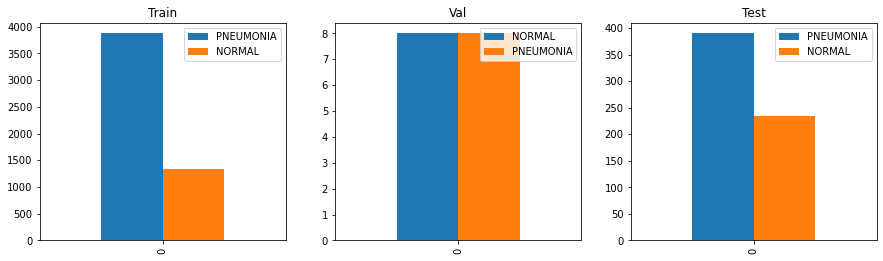

In [6]:
sets = [trainset, validset, testset]
ds_names = ['Train', 'Val', 'Test']
fig, ax = plt.subplots(1, 3, figsize=(15,4))

for i in range(0, len(sets)):
    targets = pd.Series(sets[i].targets)
    targets = targets.value_counts()
    df = pd.DataFrame(targets)
    df = df.T
    df.rename(columns={1: 'PNEUMONIA', 0: 'NORMAL'}, inplace=True)
    df.plot.bar(ax=ax[i])
    ax[i].set_title(ds_names[i])
    print(ds_names[i])
    print(df)

<center><h3> <font color='blue'> Visualizing the Augmented Images </font> </h3> </center>

<p style="text-align:justify;">
    <b>We will have a look at some augmented images from all the 3 sets. The Augmentation is done in the user-defined<i> data_transforms()</i> method in the <i> utils.py </i> file. </b></p>

In [7]:
def show_aug_image(data, img, label, img1, label1):
    tit1 = 'Label: ', data.classes[label], "("+str(label)+")"
    tit2 = 'Label: ', data.classes[label1], "("+str(label1)+")"
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
    ax1.imshow(img.permute(1, 2, 0))
    ax1.set_title(tit1, fontsize=18)
    ax2.imshow(img1.permute(1, 2, 0))
    ax2.set_title(tit2, fontsize=18)

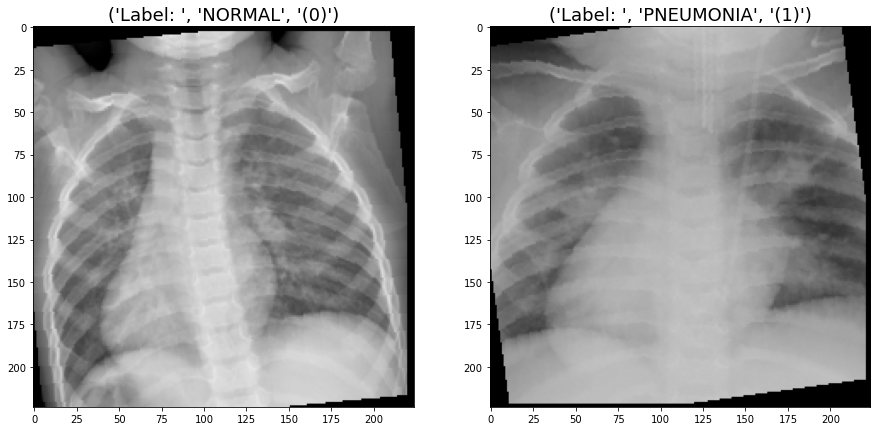

In [8]:
# Augmentations in Trainset
show_aug_image(trainset,*trainset[0],*trainset[len(trainset) - 3])

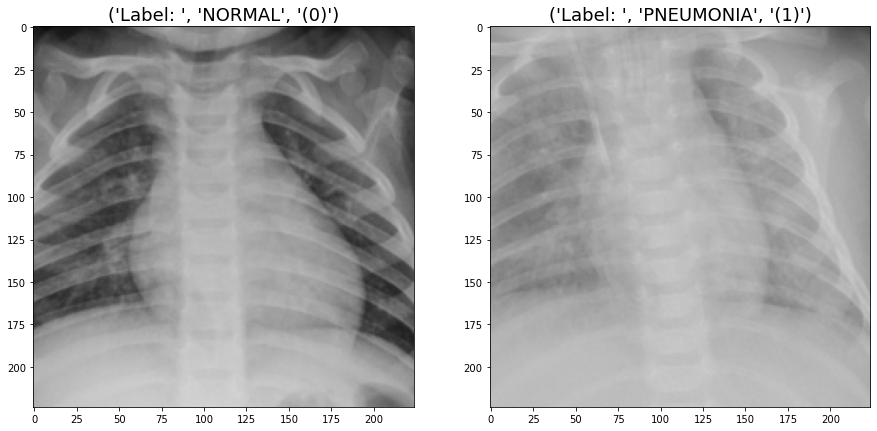

In [9]:
# Augmentations in ValidationSet
show_aug_image(validset,*validset[3],*validset[len(validset) - 3])

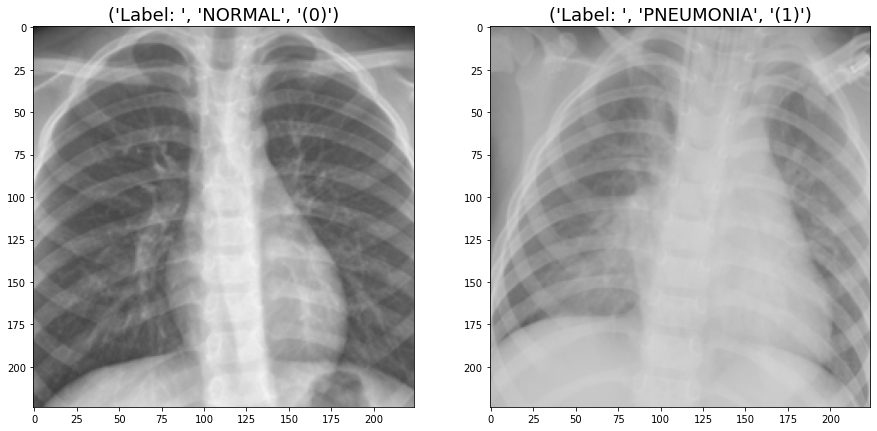

In [10]:
# Augmentations in TestSet
show_aug_image(testset,*testset[0],*testset[len(testset) - 3])

***

<center><h2> <font color='green'> Without Combining & Splitting Train & Validation Set </font> </h2> </center>

<h3 style="text-align:justify;">
    <b>Firstly we will look at the Original Datasets which are without combining or splitting the train and validation set. Herein, I have implemented 2 Models, 1 is what I call the X-Ray CNN which is developed from scratch with trials and errors and the other is the famous ResNet50 which is a Transfer Learning Model.</b></h3>

***

<center><h2> <font color='green'> Hyperparameter Tuning </font> </h2> </center>

In [11]:
epochs = 15 # No. of epochs
lr = 0.0001 # Learning Rate
opt_func = torch.optim.Adam # Optimizer
patience = 8 # patience for early stopping
weight = torch.FloatTensor([3875/(1341+3875), 1341/(1341+3875)]).to(device) # weighted loss for data class imbalance
loss_function = nn.CrossEntropyLoss # loss function

***

<center><h2> <font color='red'> X-Ray CNN (My Model) </font> </h2> </center>

<center><h3> <font color='blue'> Training and Evaluation </font> </h3> </center>

In [12]:
# Loading the train and validation data loaders into Device.
train_dl = utils.DeviceDataLoader(train_dl_ws, device)
val_dl = utils.DeviceDataLoader(val_dl_ws, device)

In [13]:
# X-Ray CNN Model initialisation.
model = utils.to_device(models_and_metrics.xray_cnnmodel(), device)

In [14]:
summary(model, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          18,496
              ReLU-5         [-1, 64, 112, 112]               0
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]          73,728
              ReLU-8          [-1, 128, 56, 56]               0
         MaxPool2d-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 256, 28, 28]         294,912
      BatchNorm2d-11          [-1, 256, 28, 28]             512
             ReLU-12          [-1, 256, 28, 28]               0
        MaxPool2d-13          [-1, 256, 14, 14]               0
           Conv2d-14          [-1, 512,

In [15]:
# Fitting the model
history, optimizer, best_loss = models_and_metrics.fit(epochs, lr, model, train_dl, val_dl, patience, weight, 
                                    loss_fn=loss_function, opt_func=opt_func, split="not_split")

  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.2536, train_acc: 0.8993, val_loss: 7.2078, val_acc: 0.5000
Validation loss decreased (inf --> 7.207826).  Saving model ...


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.1717, train_acc: 0.9367, val_loss: 0.4080, val_acc: 0.6875
Validation loss decreased (7.207826 --> 0.407951).  Saving model ...


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.1442, train_acc: 0.9477, val_loss: 3.4697, val_acc: 0.5625
EarlyStopping counter: 1 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.1362, train_acc: 0.9517, val_loss: 1.5427, val_acc: 0.5625
EarlyStopping counter: 2 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.1254, train_acc: 0.9525, val_loss: 0.6290, val_acc: 0.7500
EarlyStopping counter: 3 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0990, train_acc: 0.9636, val_loss: 0.9475, val_acc: 0.5625
EarlyStopping counter: 4 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.1018, train_acc: 0.9622, val_loss: 0.4663, val_acc: 0.8750
EarlyStopping counter: 5 out of 8


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.49it/s]


Epoch [8], train_loss: 0.1022, train_acc: 0.9636, val_loss: 0.3366, val_acc: 0.7500
Validation loss decreased (0.407951 --> 0.336556).  Saving model ...


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0917, train_acc: 0.9651, val_loss: 0.9291, val_acc: 0.6250
EarlyStopping counter: 1 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.0891, train_acc: 0.9657, val_loss: 1.5684, val_acc: 0.5625
EarlyStopping counter: 2 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.0836, train_acc: 0.9697, val_loss: 1.3765, val_acc: 0.6250
EarlyStopping counter: 3 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.1022, train_acc: 0.9628, val_loss: 0.5701, val_acc: 0.7500
EarlyStopping counter: 4 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.0853, train_acc: 0.9682, val_loss: 0.4120, val_acc: 0.7500
EarlyStopping counter: 5 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.0826, train_acc: 0.9668, val_loss: 0.5956, val_acc: 0.8125
EarlyStopping counter: 6 out of 8


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


Epoch [15], train_loss: 0.0939, train_acc: 0.9640, val_loss: 0.2382, val_acc: 0.8750
Validation loss decreased (0.336556 --> 0.238203).  Saving model ...


<center><h3> <font color='blue'> Interpreting the Plot </font> </h3> </center>

In [16]:
print('Best loss is:', best_loss)

Best loss is: 0.23820310831069946


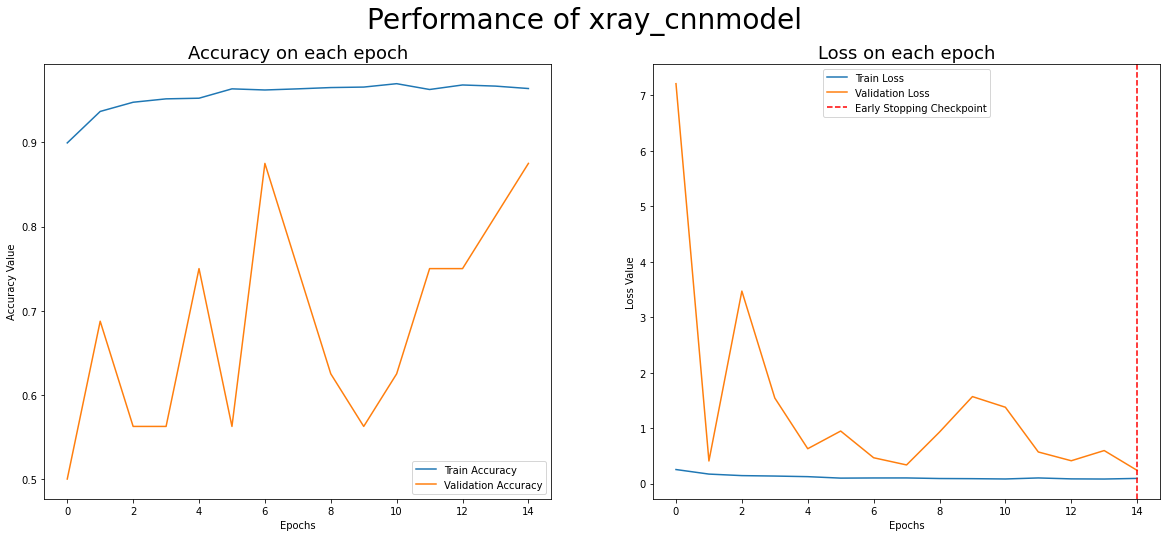

In [17]:
start_time = time.strftime("%d%m%y_%H%M%S")
fig = models_and_metrics.get_plots(model, history['train_acc'], history['val_acc'], history['train_loss'], history['val_loss'])
fig.savefig('figs/'+model.__class__.__name__+'_'+'not_split'+'_'+start_time+'.png')

<center><h3> <font color='blue'> Testing the model on Unseen Data</font> </h3> </center>

<h4 style="text-align:justify;">
    <b>I have given a separate notebook script for looking at the final submitted model checkpoints with the metrics included in the report. The fit method above already loads the model with the best model checkpoint, so there is no need to explicitly load the .pt model over here. However, you can see your model in the <i>model_checkpoints</i> folder with appropriate timestamp. </b></h4>

In [18]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_ws, device)

In [19]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:13<00:00,  2.83it/s]

test_loss: 0.4593, test_acc: 0.8397


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       234
           1       0.84      0.92      0.88       390

    accuracy                           0.84       624
   macro avg       0.84      0.81      0.82       624
weighted avg       0.84      0.84      0.84       624



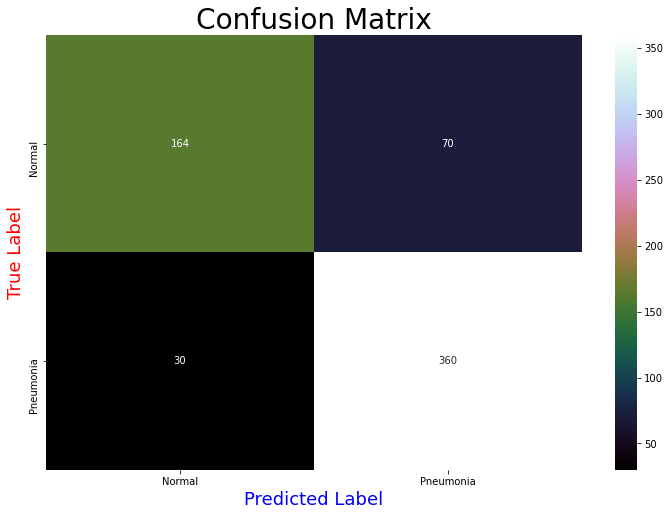

Accuracy of the model is 0.84
Recall of the model is 0.92
Precision of the model is 0.84
F1 Score of the model is 0.88
ROC-AUC of the model is 0.81


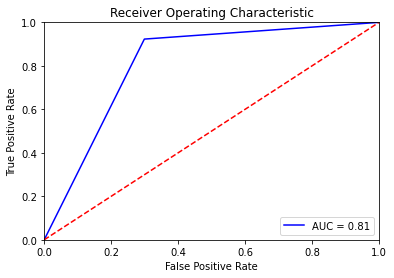

In [20]:
# Looking at the Evaluation Metrics
models_and_metrics.get_metrics(labels, preds)

***

<center><h2> <font color='red'> ResNet50 (Transfer Learning) </font> </h2> </center>

<center><h3> <font color='blue'> Training and Evaluation </font> </h3> </center>

In [21]:
# Loading the train and validation data loaders into Device.
train_dl = utils.DeviceDataLoader(train_dl_ws, device)
val_dl = utils.DeviceDataLoader(val_dl_ws, device)

In [22]:
# ResNet50 Transfer Learning Model initialisation.
model = utils.to_device(models_and_metrics.ResNet50(), device)

In [23]:
summary(model, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [24]:
# Fitting the model
history, optimizer, best_loss = models_and_metrics.fit(epochs, lr, model, train_dl, val_dl, patience, weight, 
                                    loss_fn=loss_function, opt_func=opt_func, split="not_split")

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.28it/s]


Epoch [1], train_loss: 0.1458, train_acc: 0.9461, val_loss: 0.8259, val_acc: 0.6875
Validation loss decreased (inf --> 0.825940).  Saving model ...


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.26it/s]


Epoch [2], train_loss: 0.1021, train_acc: 0.9643, val_loss: 0.1703, val_acc: 0.8125
Validation loss decreased (0.825940 --> 0.170292).  Saving model ...


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0807, train_acc: 0.9711, val_loss: 0.3711, val_acc: 0.9375
EarlyStopping counter: 1 out of 8


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.23it/s]


Epoch [4], train_loss: 0.0556, train_acc: 0.9812, val_loss: 0.0636, val_acc: 1.0000
Validation loss decreased (0.170292 --> 0.063592).  Saving model ...


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0528, train_acc: 0.9785, val_loss: 0.4793, val_acc: 0.8125
EarlyStopping counter: 1 out of 8


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.31it/s]


Epoch [6], train_loss: 0.0504, train_acc: 0.9827, val_loss: 0.0276, val_acc: 1.0000
Validation loss decreased (0.063592 --> 0.027596).  Saving model ...


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0513, train_acc: 0.9822, val_loss: 0.7802, val_acc: 0.8125
EarlyStopping counter: 1 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0483, train_acc: 0.9831, val_loss: 0.1985, val_acc: 0.8750
EarlyStopping counter: 2 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0413, train_acc: 0.9845, val_loss: 0.0477, val_acc: 1.0000
EarlyStopping counter: 3 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.0409, train_acc: 0.9862, val_loss: 0.0496, val_acc: 1.0000
EarlyStopping counter: 4 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.0366, train_acc: 0.9854, val_loss: 0.1790, val_acc: 0.9375
EarlyStopping counter: 5 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.0313, train_acc: 0.9885, val_loss: 0.0492, val_acc: 0.9375
EarlyStopping counter: 6 out of 8


  0%|                                                                                          | 0/326 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.0386, train_acc: 0.9868, val_loss: 0.3681, val_acc: 0.9375
EarlyStopping counter: 7 out of 8


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.91it/s]

Epoch [14], train_loss: 0.0360, train_acc: 0.9881, val_loss: 0.1250, val_acc: 0.9375
EarlyStopping counter: 8 out of 8
Early stopping


<center><h3> <font color='blue'> Interpreting the Plot </font> </h3> </center>

In [25]:
print('Best loss is:', best_loss)

Best loss is: 0.027595994994044304


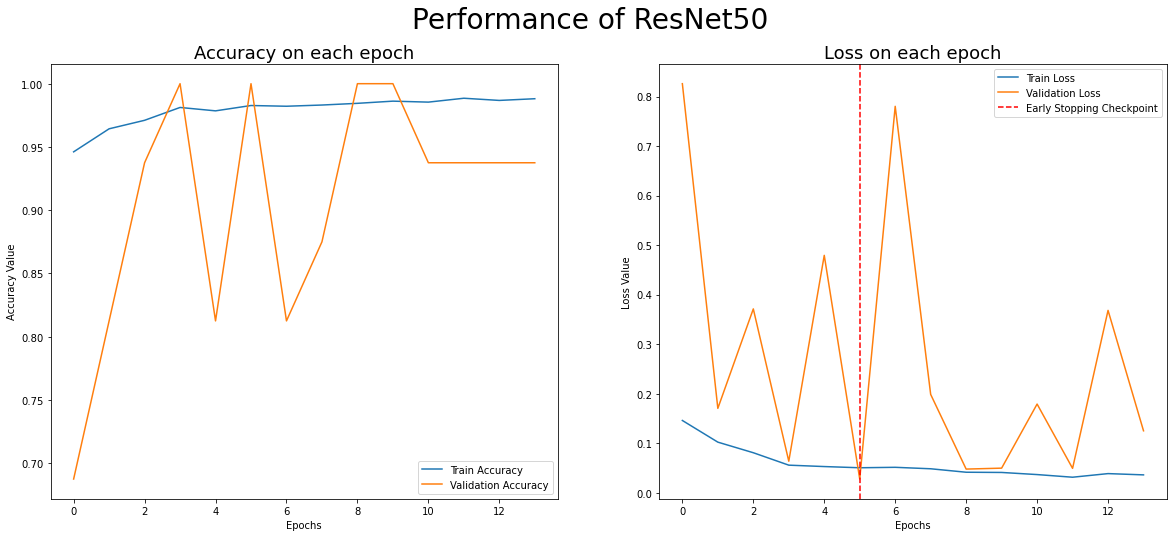

In [26]:
start_time = time.strftime("%d%m%y_%H%M%S")
fig = models_and_metrics.get_plots(model, history['train_acc'], history['val_acc'], history['train_loss'], history['val_loss'])
fig.savefig('figs/'+model.__class__.__name__+'_'+'not_split'+'_'+start_time+'.png')

<center><h3> <font color='blue'> Testing the model on Unseen Data</font> </h3> </center>

<h4 style="text-align:justify;">
    <b>I have given a separate notebook script for looking at the final submitted model checkpoints with the metrics included in the report. The fit method above already loads the model with the best model checkpoint, so there is no need to explicitly load the .pt model over here. However, you can see your model in the <i>model_checkpoints</i> folder with appropriate timestamp. </b></h4>

In [27]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_ws, device)

In [28]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:17<00:00,  2.22it/s]

test_loss: 0.3109, test_acc: 0.9183


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       234
           1       0.90      0.98      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.90      0.91       624
weighted avg       0.92      0.92      0.92       624



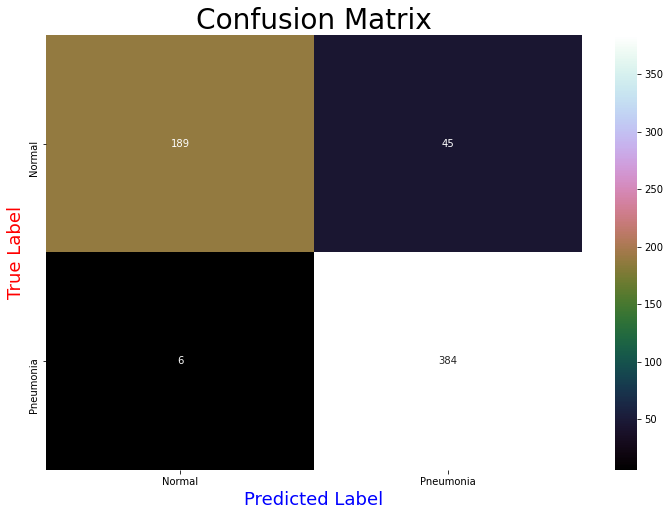

Accuracy of the model is 0.92
Recall of the model is 0.98
Precision of the model is 0.90
F1 Score of the model is 0.94
ROC-AUC of the model is 0.90


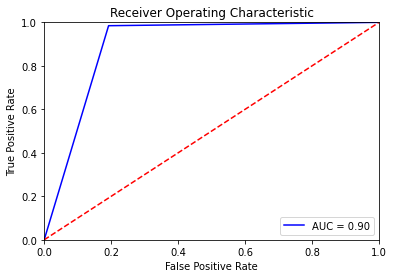

In [29]:
# Looking at the Evaluation Metrics
models_and_metrics.get_metrics(labels, preds)

***

<center><h2> <font color='green'> With Combining & Splitting Train & Validation Set </font> </h2> </center>

<h3 style="text-align:justify;">
    <b>Now we will evaluate the combined (train and valid) and further splitted (90-10%) datasets on the same models.</b></h3>

***

<center><h2> <font color='green'> Hyperparameter Tuning </font> </h2> </center>

<h4 style="text-align:justify;">
    <b>Firstly, we will look at the class distribution in the training dataset after splitting it, to get the idea of the weights to be given for the CrossEntropy function </b></h4>

In [30]:
train_labels = []
for i in tqdm(range(len(trainset_s))):
    train_labels.append(trainset_s[i][1])

100%|██████████████████████████████████████████████████████████████████████████████| 4709/4709 [01:39<00:00, 47.14it/s]


Training Set:

   PNEUMONIA  NORMAL
0       3499    1210


<Figure size 1080x288 with 0 Axes>

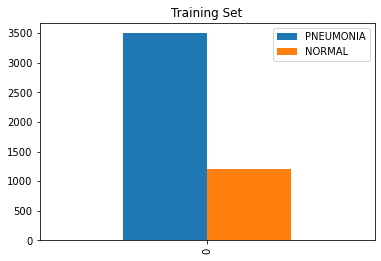

In [31]:
targets = pd.Series(train_labels)
targets = targets.value_counts()
df = pd.DataFrame(targets)
df = df.T
df.rename(columns={1: 'PNEUMONIA', 0: 'NORMAL'}, inplace=True)
plt.figure(figsize=(15,4))
df.plot.bar()
plt.title('Training Set')
print('Training Set:\n')
print(df)
plt.show()

In [11]:
epochs = 15 # No. of epochs
lr = 0.0001 # Learning Rate
opt_func = torch.optim.Adam # Optimizer
patience = 8 # patience for early stopping
weight = torch.FloatTensor([3499/(1210+3499), 1210/(1210+3499)]).to(device) # weighted loss for data class imbalance
loss_function = nn.CrossEntropyLoss # loss function

***

<center><h2> <font color='red'> X-Ray CNN (My Model) </font> </h2> </center>

<center><h3> <font color='blue'> Training and Evaluation </font> </h3> </center>

In [33]:
# Loading the train and validation data loaders into Device.
train_dl = utils.DeviceDataLoader(train_dl_s, device)
val_dl = utils.DeviceDataLoader(val_dl_s, device)

In [34]:
# X-Ray CNN Model initialisation.
model = utils.to_device(models_and_metrics.xray_cnnmodel(), device)

In [35]:
summary(model, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          18,496
              ReLU-5         [-1, 64, 112, 112]               0
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]          73,728
              ReLU-8          [-1, 128, 56, 56]               0
         MaxPool2d-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 256, 28, 28]         294,912
      BatchNorm2d-11          [-1, 256, 28, 28]             512
             ReLU-12          [-1, 256, 28, 28]               0
        MaxPool2d-13          [-1, 256, 14, 14]               0
           Conv2d-14          [-1, 512,

In [36]:
# Fitting the model
history, optimizer, best_loss = models_and_metrics.fit(epochs, lr, model, train_dl, val_dl, patience, weight, 
                                    loss_fn=loss_function, opt_func=opt_func, split="split")

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:11<00:00,  2.77it/s]


Epoch [1], train_loss: 0.2417, train_acc: 0.8992, val_loss: 0.4741, val_acc: 0.7173
Validation loss decreased (inf --> 0.474095).  Saving model ...


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.1578, train_acc: 0.9409, val_loss: 0.1424, val_acc: 0.9564
Validation loss decreased (0.474095 --> 0.142385).  Saving model ...


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.1511, train_acc: 0.9381, val_loss: 0.1498, val_acc: 0.9366
EarlyStopping counter: 1 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.1268, train_acc: 0.9517, val_loss: 0.1403, val_acc: 0.9318
Validation loss decreased (0.142385 --> 0.140279).  Saving model ...


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.1126, train_acc: 0.9581, val_loss: 0.2324, val_acc: 0.8969
EarlyStopping counter: 1 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.1182, train_acc: 0.9555, val_loss: 0.1853, val_acc: 0.9640
EarlyStopping counter: 2 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.1089, train_acc: 0.9589, val_loss: 0.1592, val_acc: 0.9659
EarlyStopping counter: 3 out of 8


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:12<00:00,  2.68it/s]


Epoch [8], train_loss: 0.1075, train_acc: 0.9566, val_loss: 0.1126, val_acc: 0.9602
Validation loss decreased (0.140279 --> 0.112577).  Saving model ...


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0919, train_acc: 0.9614, val_loss: 0.1233, val_acc: 0.9659
EarlyStopping counter: 1 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.0819, train_acc: 0.9657, val_loss: 0.1282, val_acc: 0.9659
EarlyStopping counter: 2 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [11], train_loss: 0.0927, train_acc: 0.9642, val_loss: 0.1668, val_acc: 0.9310
EarlyStopping counter: 3 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [12], train_loss: 0.0970, train_acc: 0.9654, val_loss: 0.1294, val_acc: 0.9602
EarlyStopping counter: 4 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [13], train_loss: 0.0882, train_acc: 0.9678, val_loss: 0.2022, val_acc: 0.9583
EarlyStopping counter: 5 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [14], train_loss: 0.0948, train_acc: 0.9631, val_loss: 0.1205, val_acc: 0.9452
EarlyStopping counter: 6 out of 8


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:12<00:00,  2.74it/s]

Epoch [15], train_loss: 0.0866, train_acc: 0.9691, val_loss: 0.1292, val_acc: 0.9575
EarlyStopping counter: 7 out of 8


<center><h3> <font color='blue'> Interpreting the Plot </font> </h3> </center>

In [37]:
print('Best loss is:', best_loss)

Best loss is: 0.1125769093632698


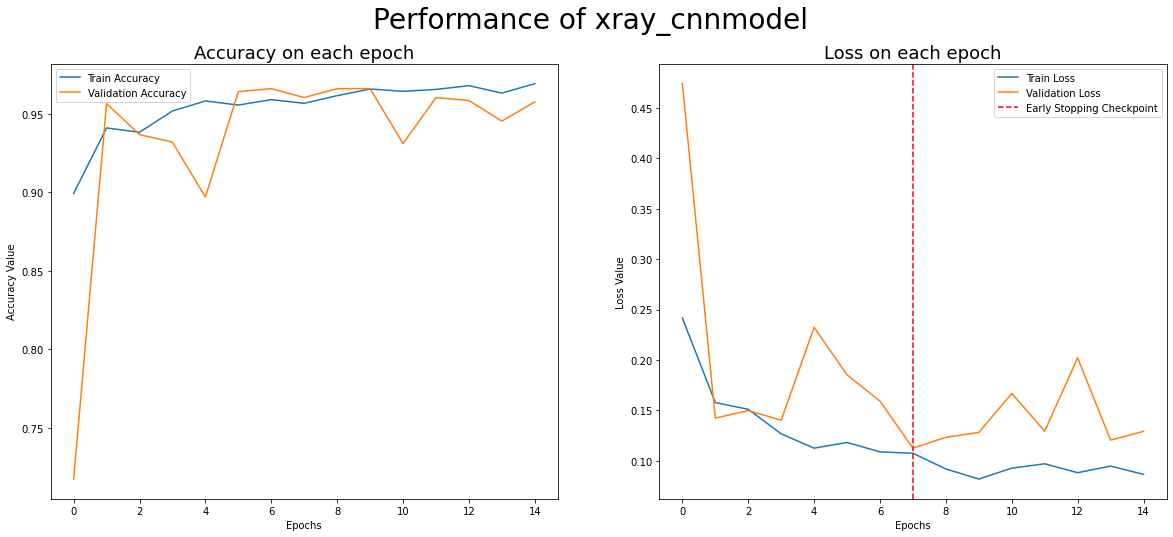

In [38]:
start_time = time.strftime("%d%m%y_%H%M%S")
fig = models_and_metrics.get_plots(model, history['train_acc'], history['val_acc'], history['train_loss'], history['val_loss'])
fig.savefig('figs/'+model.__class__.__name__+'_'+'split'+'_'+start_time+'.png')

<center><h3> <font color='blue'> Testing the model on Unseen Data</font> </h3> </center>

<h4 style="text-align:justify;">
    <b>I have given a separate notebook script for looking at the final submitted model checkpoints with the metrics included in the report. The fit method above already loads the model with the best model checkpoint, so there is no need to explicitly load the .pt model over here. However, you can see your model in the <i>model_checkpoints</i> folder with appropriate timestamp. </b></h4>

In [39]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_s, device)

In [40]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:13<00:00,  2.89it/s]

test_loss: 0.6914, test_acc: 0.8221


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71       234
           1       0.79      0.97      0.87       390

    accuracy                           0.82       624
   macro avg       0.86      0.77      0.79       624
weighted avg       0.84      0.82      0.81       624



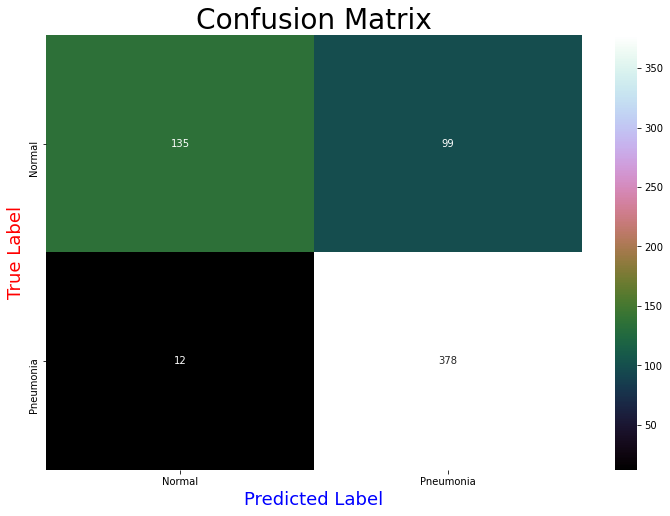

Accuracy of the model is 0.82
Recall of the model is 0.97
Precision of the model is 0.79
F1 Score of the model is 0.87
ROC-AUC of the model is 0.77


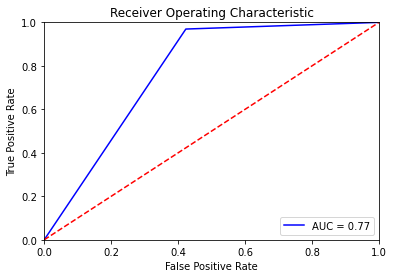

In [41]:
# Looking at the Evaluation Metrics
models_and_metrics.get_metrics(labels, preds)

***

<center><h2> <font color='red'> ResNet50 (Transfer Learning) </font> </h2> </center>

<center><h3> <font color='blue'> Training and Evaluation </font> </h3> </center>

In [12]:
# Loading the train and validation data loaders into Device.
train_dl = utils.DeviceDataLoader(train_dl_s, device)
val_dl = utils.DeviceDataLoader(val_dl_s, device)

In [13]:
# ResNet50 Transfer Learning Model initialisation.
model = utils.to_device(models_and_metrics.ResNet50(), device)

In [14]:
summary(model, input_size = (3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [15]:
# Fitting the model
history, optimizer, best_loss = models_and_metrics.fit(epochs, lr, model, train_dl, val_dl, patience, weight, 
                                    loss_fn=loss_function, opt_func=opt_func, split="split")

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:14<00:00,  2.23it/s]


Epoch [1], train_loss: 0.1528, train_acc: 0.9449, val_loss: 0.1023, val_acc: 0.9735
Validation loss decreased (inf --> 0.102333).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:14<00:00,  2.20it/s]


Epoch [2], train_loss: 0.0975, train_acc: 0.9661, val_loss: 0.0911, val_acc: 0.9764
Validation loss decreased (0.102333 --> 0.091067).  Saving model ...


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:14<00:00,  2.21it/s]


Epoch [3], train_loss: 0.0907, train_acc: 0.9689, val_loss: 0.0486, val_acc: 0.9830
Validation loss decreased (0.091067 --> 0.048631).  Saving model ...


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0713, train_acc: 0.9745, val_loss: 0.1253, val_acc: 0.9745
EarlyStopping counter: 1 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0541, train_acc: 0.9805, val_loss: 0.0499, val_acc: 0.9793
EarlyStopping counter: 2 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0540, train_acc: 0.9831, val_loss: 0.0766, val_acc: 0.9745
EarlyStopping counter: 3 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0426, train_acc: 0.9847, val_loss: 0.0505, val_acc: 0.9859
EarlyStopping counter: 4 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0372, train_acc: 0.9886, val_loss: 0.0609, val_acc: 0.9811
EarlyStopping counter: 5 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0337, train_acc: 0.9894, val_loss: 0.0580, val_acc: 0.9699
EarlyStopping counter: 6 out of 8


  0%|                                                                                          | 0/295 [00:00<?, ?it/s]

Epoch [10], train_loss: 0.0307, train_acc: 0.9896, val_loss: 0.0616, val_acc: 0.9840
EarlyStopping counter: 7 out of 8


100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [00:15<00:00,  2.14it/s]

Epoch [11], train_loss: 0.0674, train_acc: 0.9775, val_loss: 0.2215, val_acc: 0.9432
EarlyStopping counter: 8 out of 8
Early stopping


<center><h3> <font color='blue'> Interpreting the Plot </font> </h3> </center>

In [16]:
print('Best loss is:', best_loss)

Best loss is: 0.048631057143211365


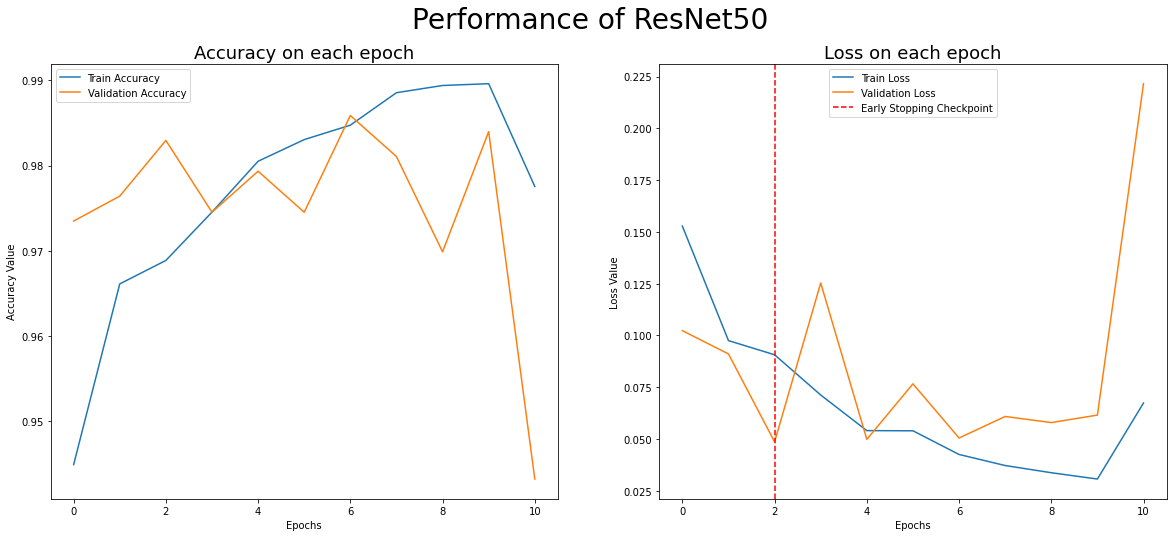

In [17]:
start_time = time.strftime("%d%m%y_%H%M%S")
fig = models_and_metrics.get_plots(model, history['train_acc'], history['val_acc'], history['train_loss'], history['val_loss'])
fig.savefig('figs/'+model.__class__.__name__+'_'+'split'+'_'+start_time+'.png')

<center><h3> <font color='blue'> Testing the model on Unseen Data</font> </h3> </center>

<h4 style="text-align:justify;">
    <b>I have given a separate notebook script for looking at the final submitted model checkpoints with the metrics included in the report. The fit method above already loads the model with the best model checkpoint, so there is no need to explicitly load the .pt model over here. However, you can see your model in the <i>model_checkpoints</i> folder with appropriate timestamp. </b></h4>

In [18]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_s, device)

In [19]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:16<00:00,  2.30it/s]

test_loss: 0.3148, test_acc: 0.9103


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       234
           1       0.88      0.99      0.93       390

    accuracy                           0.91       624
   macro avg       0.93      0.88      0.90       624
weighted avg       0.92      0.91      0.91       624



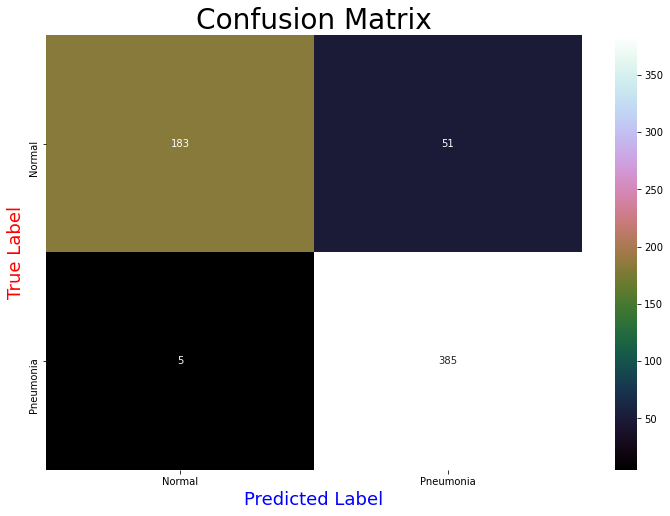

Accuracy of the model is 0.91
Recall of the model is 0.99
Precision of the model is 0.88
F1 Score of the model is 0.93
ROC-AUC of the model is 0.88


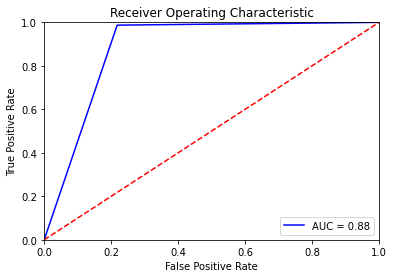

In [20]:
# Looking at the Evaluation Metrics
models_and_metrics.get_metrics(labels, preds)